In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
def generate_regression_data(n=30):
    # Generate regression dataset
    X = np.linspace(-5, 5, n).reshape(-1, 1)
    y = np.sin(2 * X) + np.cos(X) + 5
    # simulate noise
    data_noise = np.random.normal(0, 0.05, n).reshape(-1, 1)
    # Generate training data
    Y = y + data_noise
    return X.reshape(-1, 1), Y.reshape(-1, 1)

X, Y = generate_regression_data()
print(X.shape, Y.shape)

(30, 1) (30, 1)


In [18]:
# Linear regression models

## One hidden layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

## Two hidden layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

## Three hidden layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

## Compile all of the models
model_1.compile(optimizer='SGD', loss='mse', metrics=['mae'])
model_2.compile(optimizer='SGD', loss='mse', metrics=['mae'])
model_3.compile(optimizer='SGD', loss='mse', metrics=['mae'])

## Train for 500 epochs all of the models:
model_1.fit(X, Y, epochs=500, verbose=0)
model_2.fit(X, Y, epochs=500, verbose=0)
model_3.fit(X, Y, epochs=500, verbose=0)

4/4 [==============================] - 0s 960us/step


4/4 [==============================] - 0s 1ms/step


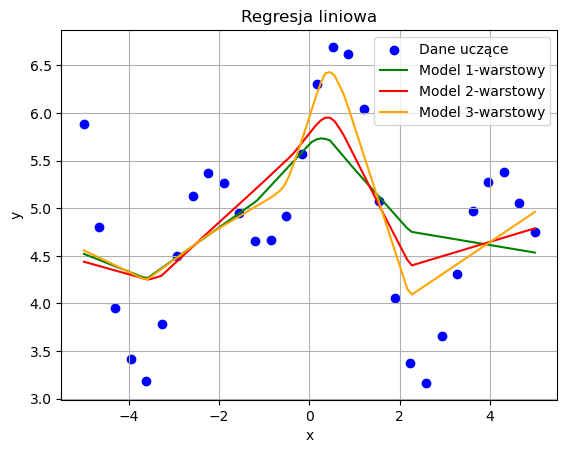

In [21]:
predX = np.linspace(np.min(X), np.max(X), 100)
predY1 = model_1.predict(predX)
predY2 = model_2.predict(predX)
predY3 = model_3.predict(predX)

plt.figure()
plt.scatter(X, Y, label='Dane uczące', color='blue')
plt.plot(predX, predY1, label='Model 1-warstowy', color='green')
plt.plot(predX, predY2, label='Model 2-warstowy', color='red')
plt.plot(predX, predY3, label='Model 3-warstowy', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Regresja")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Best model was the first one (probably because of the biggest size? lol)

## recreating it with additinal normalization layer
model_new = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Normalization(mean=0., variance=1.),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

model_new.compile(optimizer='SGD', loss='mse', metrics=['mae'])
model_new.fit(X, Y, epochs=1000, verbose=0)

4/4 [==============================] - 0s 1ms/step


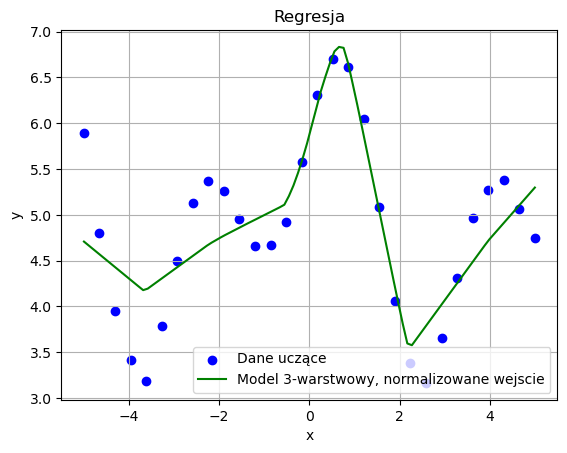

In [24]:
predX = np.linspace(np.min(X), np.max(X), 100)
predY = model_new.predict(predX)

plt.figure()
plt.scatter(X, Y, label='Dane uczące', color='blue')
plt.plot(predX, predY, label='Model 3-warstwowy, normalizowane wejscie', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Regresja")
plt.legend()
plt.grid(True)
plt.show()